In [2]:
import pandas as pd

In [4]:

df = pd.read_csv("Superstore Sales Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
# Convert date columns to datetime format for time-based analysis
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

# Extract year and month for trend analysis
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Extract order fulfillment time
df["Delivery Time (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Now, I'll perform various analyses based on the given objectives. Let's start with sales performance analysis.
sales_performance = df.groupby(["Year", "Month"])["Sales"].sum().reset_index()
sales_performance


,Year,Month,Sales
0,2015,1,14205.7070
1,2015,2,4519.8920
2,2015,3,55205.7970
3,2015,4,27906.8550
4,2015,5,23644.3030
5,2015,6,34322.9356
6,2015,7,33781.5430
7,2015,8,27117.5365
8,2015,9,81623.5268
9,2015,10,31453.3930


In [8]:
# Extract Year and Month from Order Date
df["Order Date"] = pd.to_datetime(df["Order Date"])  # Ensure correct format
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Aggregate sales data by Year and Month
sales_performance = df.groupby(["Year", "Month"])["Sales"].sum().reset_index()

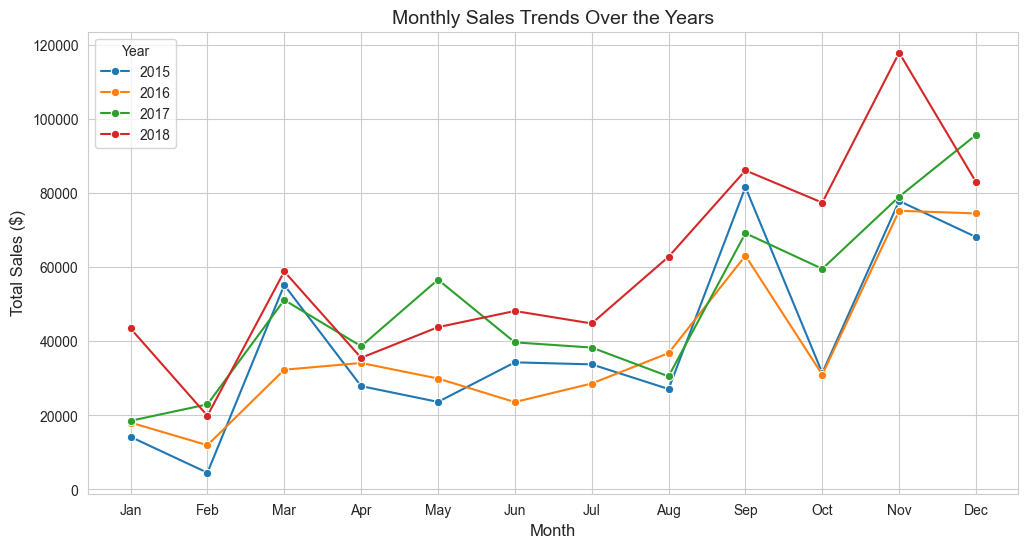

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot sales trends over time
sns.lineplot(data=sales_performance, x="Month", y="Sales", hue="Year", marker="o", palette="tab10")

# Customize the plot
plt.title("Monthly Sales Trends Over the Years", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()



C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_21156\3746169120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")


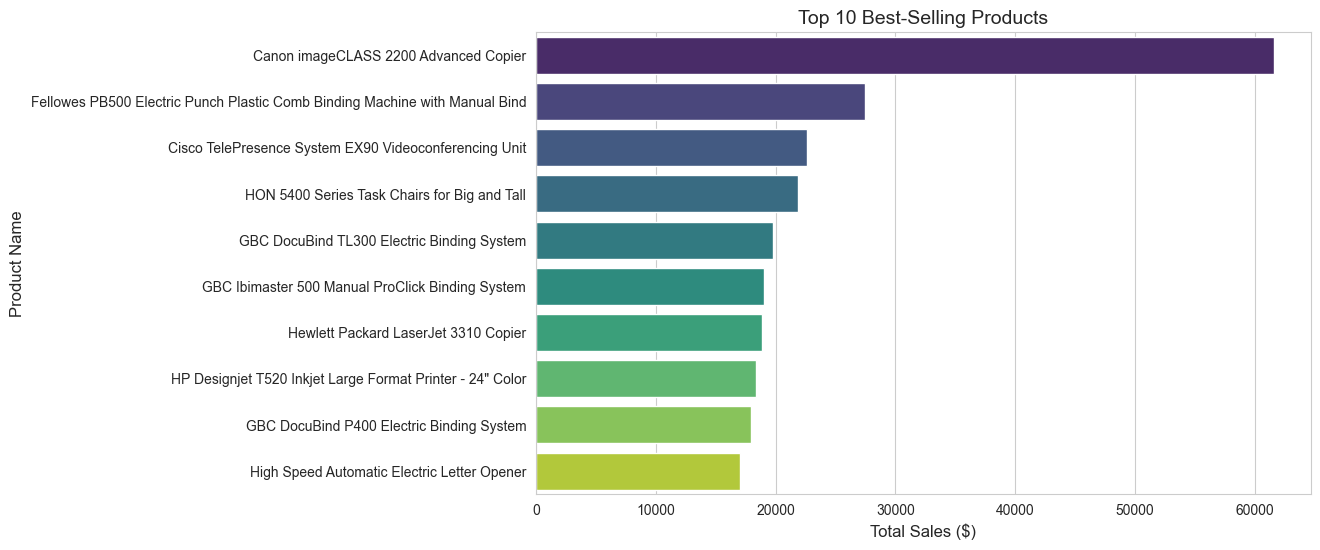

In [13]:
#Top 10 Best-Selling Products
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()


C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_21156\2859264234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_sales.index, x=region_sales.values, palette="coolwarm")


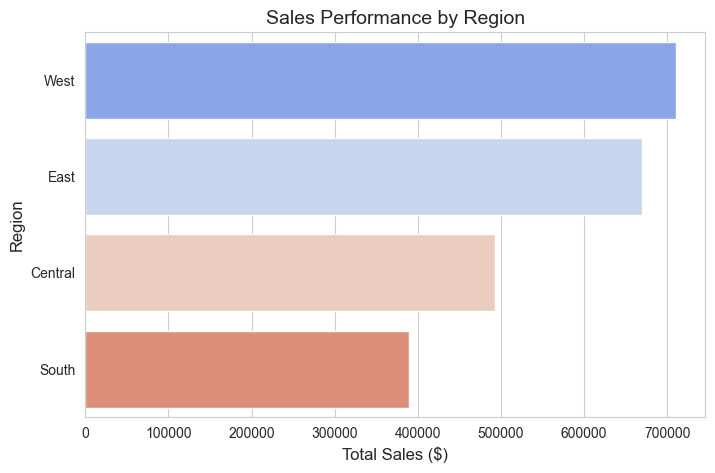

In [15]:
#Sales Performance by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(y=region_sales.index, x=region_sales.values, palette="coolwarm")
plt.title("Sales Performance by Region", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()


C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_21156\691103800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=profit_per_category.index, x=profit_per_category.values, palette="coolwarm")


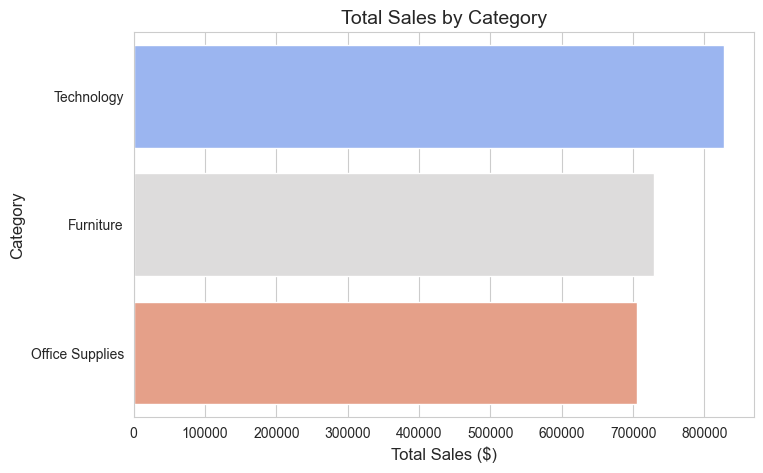

In [17]:
# 2. Most Profitable Categories
plt.figure(figsize=(8, 5))
sns.barplot(y=profit_per_category.index, x=profit_per_category.values, palette="coolwarm")
plt.title("Total Sales by Category", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()


In [18]:

# Calculate Order Fulfillment Time (Days between Order Date and Ship Date)
df["Fulfillment Time (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

# 1. Evaluate Order Fulfillment Times
avg_fulfillment_time = df["Fulfillment Time (Days)"].mean()
fulfillment_distribution = df["Fulfillment Time (Days)"].value_counts().sort_index()

# 2. Identify Supply Chain Bottlenecks - Check delays (Orders taking longer than average)
delayed_orders = df[df["Fulfillment Time (Days)"] > avg_fulfillment_time]

# 3. Optimize Shipping Modes - Compare average fulfillment time per shipping mode
shipping_mode_analysis = df.groupby("Ship Mode")["Fulfillment Time (Days)"].mean().sort_values()

# Display calculated metrics
avg_fulfillment_time, delayed_orders.shape[0], shipping_mode_analysis


(np.float64(3.9611224489795918),
 6650,
 Ship Mode
 Same Day          0.044610
 First Class       2.179214
 Second Class      3.249211
 Standard Class    5.008363
 Name: Fulfillment Time (Days), dtype: float64)